# K-means Clustering 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def load_data():
    X = np.load("data/ex7_X.npy")
    return X

def draw_line(p1, p2, style="-k", linewidth=1):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], style, linewidth=linewidth)

def plot_data_points(X, idx):
    # plots data points in X, coloring them so that those with the same
    # index assignments in idx have the same color
    plt.scatter(X[:, 0], X[:, 1], c=idx)
    

In [3]:
def plot_progress_kmeans(X, centroids, previous_centroids, idx, K, i):
    # Plot the examples
    plot_data_points(X, idx)
    
    # Plot the centroids as black 'x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)
    
    # Plot history of the centroids with lines
    for j in range(centroids.shape[0]):
        draw_line(centroids[j, :], previous_centroids[j, :])
    
    plt.title("Iteration number %d" %i)

## Implementing K-means

The K-means algorithm is a method to automatically cluster similar
data points together. 

- Concretely, for a given a training set $\{x^{(1)}, ..., x^{(m)}\}$, it can be grouped into few cohesive clusters

- K-means is an iterative procedure that
     - Starts by guessing the initial centroids, and then 
     - Refines this guess by 
         - Repeatedly assigning examples to their closest centroids, and then 
         - Recomputing the centroids based on the assignments.
         

- The $K$-means algorithm will always converge to some final set of means for the centroids. 

- However, that the converged solution may not always be ideal and depends on the initial setting of the centroids.
    - Therefore, in practice the K-means algorithm is usually run a few times with different random initializations. 
    - One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion).

### Finding closest centroids

In the "cluster assignment" phase of the K-means algorithm, the assigns every training example $x^{(i)}$ to its closest centroid, given the current positions of centroids. 

- This function takes the data matrix `X` and the locations of all centroids inside `centroids` 

- It should output a one-dimensional array `idx` (which has the same number of elements as `X`) that holds the index  of the closest centroid (a value in $\{1,...,K\}$, where $K$ is total number of centroids) to every training example .

- Specifically, for every example $x^{(i)}$ we set
$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$

where 

	- $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ (corresponds to `idx[i]` in the starter code), and 
	- $\mu_j$ is the position (value) of the $j$’th centroid. (stored in `centroids` in the starter code)

In [4]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X: (m, n) Input values      
        centroids: k centroids
    
    Returns:
        idx: (m,) closest centroids
    
    """

    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
          # Array to hold distance between X[i] and each centroids[j]
          distance = [] 
          for j in range(centroids.shape[0]):
              norm_ij = np.linalg.norm(X[i] - centroids[j])
              distance.append(norm_ij)

          idx[i] = np.argmin(distance)

    return idx

In [5]:
X = load_data()

The code below prints the first five elements in the variable `X` and the dimensions of the variable

In [6]:
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [7]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

First three elements in idx are: [0 2 1]


### Computing centroid means


* Specifically, for every centroid $\mu_k$ we set
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$ 

    where 
    * $C_k$ is the set of examples that are assigned to centroid $k$
    * $|C_k|$ is the number of examples in the set $C_k$


* Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k=2$,
then you should update $\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$.


In [8]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X: (m, n) Data points
        idx: (m,) Array containing index of closest centroid for each  example in X. Concretely, idx[i] contains the index of the centroid closest to example i
        K: number of centroids
    
    Returns:
        centroids: (K, n) New centroids computed
    """
    
    m, n = X.shape
    
    centroids = np.zeros((K, n))
    
    for k in range(K):   
          points = X[idx == k]  
          centroids[k] = np.mean(points, axis = 0)

    return centroids

In [9]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)



The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


## K-means on a sample dataset 


In [10]:
def run_kmeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    for i in range(max_iters):
        
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        idx = find_closest_centroids(X, centroids)
        
        if plot_progress:
            plot_progress_kmeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


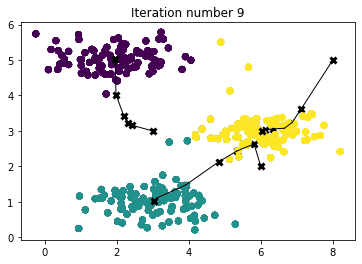

In [11]:
X = load_data()

initial_centroids = np.array([[3,3],[6,2],[8,5]])
K = 3

max_iters = 10

centroids, idx = run_kmeans(X, initial_centroids, max_iters, plot_progress=True)

Random initialization

A good strategy for initializing the centroids is to select random examples from the training set.

In [12]:
def kmeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X: Data points 
        K: number of centroids/clusters
    
    Returns:
        centroids: Initialized centroids
    """
    
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]
    return centroids

## Image compression with K-means

- In a straightforward 24-bit color representation of an image$, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
- Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of colors to 16 colors.
- By making this reduction, it is possible to represent (compress) the photo in an efficient way. 
- only RGB values of the 16 selected colors need to be stored, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).

In this part, K-means algorithm is used to select the 16 colors that will be used to represent the compressed image.
	- Concretely, treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space. 
	- Once cluster is computed for centroids on the image, use the 16 colors to replace the pixels in the original image.


In [13]:
# Load an image of a bird
original_img = plt.imread('data/bird_small.png')

**Visualize image**

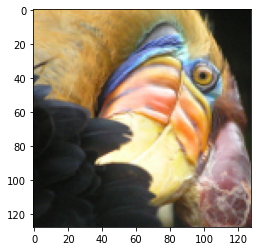

In [14]:
plt.imshow(original_img)

**Check the dimension of the variable**

In [15]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)


This creates a three-dimensional matrix `original_img` where 
	- the first two indices identify a pixel position, and
	- the third index represents red, green, or blue. 

For example, `original_img[50, 33, 2]` gives the blue intensity of the pixel at row 50 and column 33.

#### Processing data

To call the `run_kmeans`, first transform the matrix `original_img` into a two-dimensional matrix.

* The code below reshapes the matrix `original_img` to create an $m \times 3$ matrix of pixel colors (where $m=16384 = 128\times128$)

In [16]:
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

### K-Means on image pixels

In [17]:
K = 16                       
max_iters = 10               

initial_centroids = kmeans_init_centroids(X_img, K) 

centroids, idx = run_kmeans(X_img, initial_centroids, max_iters) 

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [18]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [10 10 10 10 10]


### Compress the image


After finding the top $K=16$ colors to represent the image, assign each pixel position to its closest centroid using the `find_closest_centroids` function. 
- This allows you to represent the original image using the centroid assignments of each pixel. 
- This significantly reduced the number of bits that are required to describe the image. 
    - The original image required 24 bits for each one of the $128\times128$ pixel locations, resulting in total size of $128 \times 128 \times 24 = 393,216$ bits. 
    - The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel location. 
    - The final number of bits used is therefore $16 \times 24 + 128 \times 128 \times 4 = 65,920$ bits, which corresponds to compressing the original image by about a factor of 6.

In [19]:
# Represent image in terms of indices
X_recovered = centroids[idx, :] 

# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

replace each pixel location with the mean of the centroid assigned to it. 

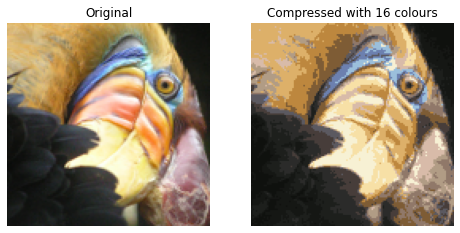

In [20]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()